In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as pyplot
import os
import tensorflow as tf
from tensorflow import keras
from keras import applications

In [5]:
# Paths to your dataset folders
train_dir = "/content/drive/MyDrive/Pattern Rcognition/Data/train"
val_dir = "/content/drive/MyDrive/Pattern Rcognition/Data/val"
test_dir = "/content/drive/MyDrive/Pattern Rcognition/Data/test"

# Load the datasets with integer labels
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(524, 524),  # Resize images to this size
    batch_size=32,          # Number of images per batch
    label_mode='int'        # Use integer labels for sparse_categorical_crossentropy
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(524, 524),
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(524, 524),
    batch_size=32,
    label_mode='int'
)

# Normalize pixel values (0 to 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 2854 files belonging to 9 classes.
Found 949 files belonging to 9 classes.
Found 957 files belonging to 9 classes.


In [13]:
#DenseNet
from tensorflow.keras.applications import DenseNet121

# Load the pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(524, 524, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')  # Adjust number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 16, 16, 1024)        │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,169,865 (27.35 MB)

 Trainable params: 132,361 (517.04 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [14]:
history_dense = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.3410 - loss: 1.8391 - val_accuracy: 0.6712 - val_loss: 0.9885
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 519ms/step - accuracy: 0.6033 - loss: 1.1164 - val_accuracy: 0.7492 - val_loss: 0.7972
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 525ms/step - accuracy: 0.6922 - loss: 0.8740 - val_accuracy: 0.7808 - val_loss: 0.6615
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 619ms/step - accuracy: 0.7327 - loss: 0.7942 - val_accuracy: 0.7998 - val_loss: 0.6057
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 75s 536ms/step - accuracy: 0.7609 - loss: 0.6905 - val_accuracy: 0.8082 - val_loss: 0.5676
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 519ms/step - accuracy: 0.7900 - loss: 0.6490 - val_accuracy: 0.8219 - val_loss: 0.5394
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 84s 536ms/step - accuracy: 0.8013 - loss: 0.6071 - val_accuracy: 0.8145 - val_loss: 0.5040
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 532ms/step - accuracy: 0.7902 - loss: 0.5782 - val_accura

In [15]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

30/30 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.8324 - loss: 0.4756
Test Accuracy: 84.12%


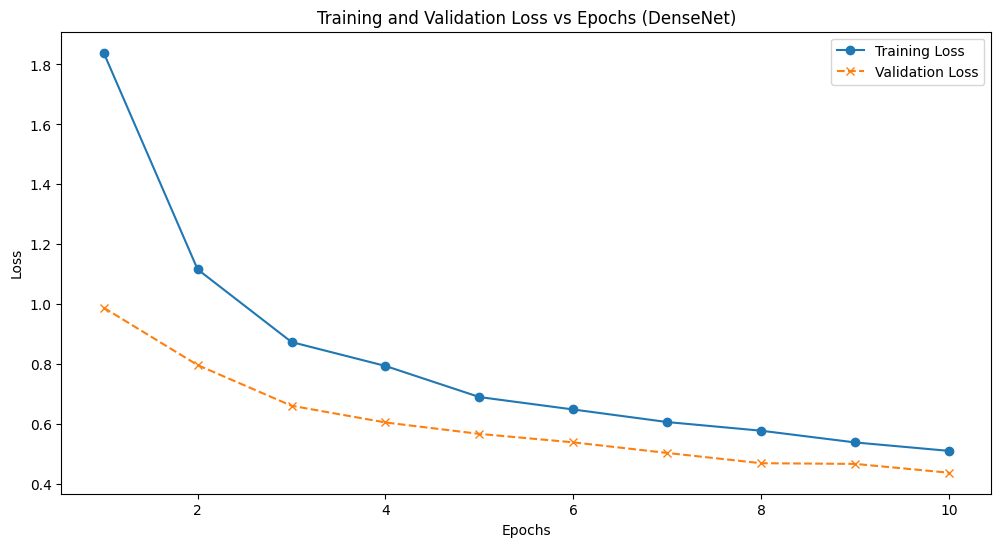

In [21]:
import matplotlib.pyplot as plt

# Data extracted from DenseNet training logs
epochs = list(range(1, 11))  # Adjust the range based on the number of epochs
loss = [
    1.8391, 1.1164, 0.8740, 0.7942, 0.6905,
    0.6490, 0.6071, 0.5782, 0.5391, 0.5109
]
val_loss = [
    0.9885, 0.7972, 0.6615, 0.6057, 0.5676,
    0.5394, 0.5040, 0.4698, 0.4675, 0.4381
]

# Plot Training and Validation Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label="Training Loss", marker="o")
plt.plot(epochs, val_loss, label="Validation Loss", marker="x", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epochs (DenseNet)")
plt.legend()
plt.show()


In [22]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(524, 524, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Global Average Pooling instead of flattening
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(9, activation='softmax')  # Adjust number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 16, 16, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,513 (56.39 MB)

 Trainable params: 66,825 (261.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
history_VGG = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.1912 - loss: 2.1968 - val_accuracy: 0.3909 - val_loss: 1.8254
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.3514 - loss: 1.8017 - val_accuracy: 0.4299 - val_loss: 1.5896
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4130 - loss: 1.6208 - val_accuracy: 0.5058 - val_loss: 1.4433
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4514 - loss: 1.5061 - val_accuracy: 0.4984 - val_loss: 1.3610
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4796 - loss: 1.4260 - val_accuracy: 0.5606 - val_loss: 1.2895
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5099 - loss: 1.3615 - val_accuracy: 0.5279 - val_loss: 1.2362
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5315 - loss: 1.2813 - val_accuracy: 0.5722 - val_loss: 1.1983
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5160 - loss: 1.2914 - val_accuracy: 0.5922 - val_

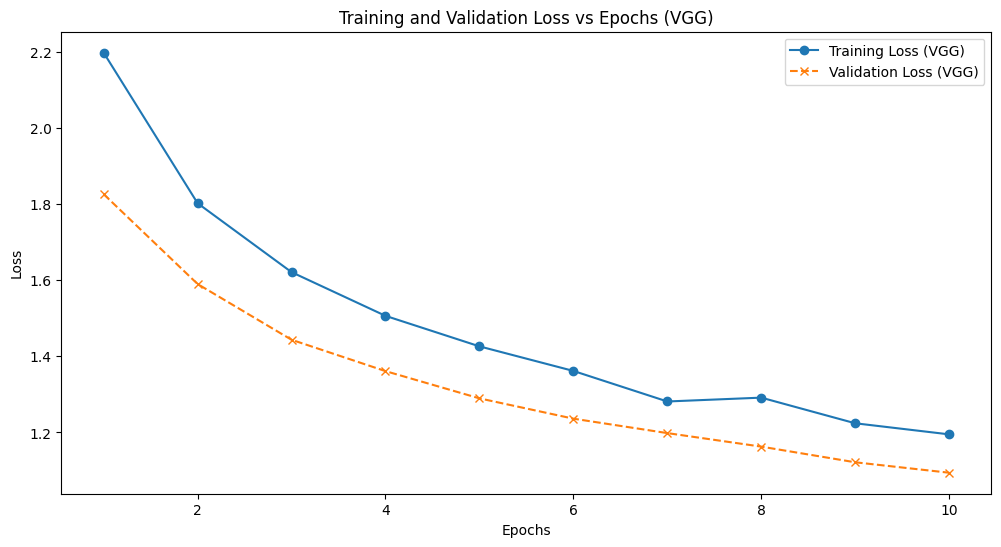

In [25]:
import matplotlib.pyplot as plt

# Data extracted from VGG training logs
epochs_vgg = list(range(1, 11))
train_loss_vgg = [
    2.1968, 1.8017, 1.6208, 1.5061, 1.4260,
    1.3615, 1.2813, 1.2914, 1.2241, 1.1950
]
val_loss_vgg = [
    1.8254, 1.5896, 1.4433, 1.3610, 1.2895,
    1.2362, 1.1983, 1.1628, 1.1217, 1.0943
]

# Plot Training and Validation Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs_vgg, train_loss_vgg, label="Training Loss (VGG)", marker="o")
plt.plot(epochs_vgg, val_loss_vgg, label="Validation Loss (VGG)", marker="x", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epochs (VGG)")
plt.legend()
plt.show()
